In [1]:
# Figure1(A-D)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pyscisci.all as pyscisci
from brokenaxes import brokenaxes
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from scipy import stats
from scipy.stats import norm, ks_2samp
from adjustText import adjust_text
from itertools import combinations
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import ast
# 定义字体
EF = FontProperties(family = 'DejaVu Sans')

%matplotlib inline

In [2]:
# 时间线与光源能量组合
main_path = r'/home/20250114zmz_kd/'

In [3]:
Edf = pd.read_csv(main_path + r'Co-utilization/2-Revision202501-DataVisualize/1-Energy_min_year.csv')
del Edf['Unnamed: 0']
print(Edf .shape)
Edf .columns

(40, 5)


Index(['SLS_Facility', 'Energy', 'EnergyData', 'Link', 'PublishedYear'], dtype='object')

In [4]:
Edf .head(3)

,SLS_Facility,Energy,EnergyData,Link,PublishedYear
0,ALBA-Spain,Mid,3 GeV,https://lightsources.org/lightsources-of-the-w...,2005.0
1,ALS-USA,Low,1.9GeV,https://lightsources.org/lightsources-of-the-w...,1991.0
2,ANKA-Germany,Mid,2.5 GeV,https://www.ibpt.kit.edu/kara.php,2014.0


In [5]:
Edf = Edf[['SLS_Facility','Energy','EnergyData','PublishedYear']]
Edf = Edf .rename(columns = {'SLS_Facility':'facility','Energy':'energy_level','EnergyData':'energy_data','PublishedYear':'begin_year'})
Edf .columns

Index(['facility', 'energy_level', 'energy_data', 'begin_year'], dtype='object')

In [6]:
# 统计发文量


In [7]:
print(Edf['energy_data'].unique())

['3 GeV' '1.9GeV' '2.5 GeV' '7GeV' '3GeV' '1.2 GeV' '1.72GeV' '6GeV'
 '2.9GeV' '0.51 GeV' '1.5 GeV' '2GeV' '3.2 GeV' '0.7 GeV' '0.58GeV'
 '0.63GeV' '0.8GeV' '6.08GeV' '0.575 GeV' '1.4 GeV' '2.4GeV' '2.75 GeV'
 '8GeV' '3.5GeV' '0.75 GeV']


In [8]:
# 去掉每列中的下划线和数字
Edf['energy_data'] = Edf['energy_data'].apply(lambda x: str(x).replace('GeV', '').replace(' ', ''))
print(Edf['energy_data'].unique())

['3' '1.9' '2.5' '7' '1.2' '1.72' '6' '2.9' '0.51' '1.5' '2' '3.2' '0.7'
 '0.58' '0.63' '0.8' '6.08' '0.575' '1.4' '2.4' '2.75' '8' '3.5' '0.75']


In [9]:
# 读取能量对与年份
energy_pair =  pd.read_csv(main_path + r'Co-utilization/2-Revision202501-DataVisualize/1-Energy_combination_year.csv')
del energy_pair['Unnamed: 0']
print(energy_pair .shape)
energy_pair .columns

(25413, 4)


Index(['work_id', 'Facility_Pair', 'PublishedYear', 'Energy_Pair'], dtype='object')

In [10]:
print(energy_pair['Energy_Pair'].unique())

["('Mid', 'High')" "('Mid', 'Mid')" "('Mid', 'Low')" "('High', 'Low')"
 "('High', 'High')" "('Low', 'Low')"]


In [11]:
# 将字符串转换为元组
energy_pair['Energy_Pair'] = energy_pair['Energy_Pair'].apply(ast.literal_eval)

heter_dict = {
    ('Mid','Mid'): 0,
    ('High','High'): 0,
    ('Mid','High'): 1,
    ('Mid','Low'): 1,
    ('Low','Low'): 0,
    ('High','Low'): 1
}
energy_pair['heter1homo0'] = energy_pair['Energy_Pair'].map(heter_dict)
print(energy_pair['heter1homo0'].unique())

homo_dict = {
    ('Mid','Mid'): 1,
    ('High','High'): 1,
    ('Mid','High'): 0,
    ('Mid','Low'): 0,
    ('Low','Low'): 1,
    ('High','Low'): 0
}
energy_pair['heter0homo1'] = energy_pair['Energy_Pair'].map(homo_dict)
print(energy_pair['heter0homo1'].unique())

[1 0]
[0 1]


In [12]:
energy_pair .columns

Index(['work_id', 'Facility_Pair', 'PublishedYear', 'Energy_Pair',
       'heter1homo0', 'heter0homo1'],
      dtype='object')

In [13]:
print(energy_pair .shape)

(25413, 6)


In [14]:
know_div = pd.read_csv(main_path + r'Co-utilization/2-Revision202501-DataVisualize/7-KnowledgeDiversity.csv')
del know_div['Unnamed: 0']
print(know_div .shape)
know_div .columns

(25413, 12)


Index(['work_id', 'Facility_Pair', 'PublishedYear', 'facility_pair_year',
       'JaccardSimilarity', 'times_cited_3', 'times_cited_5', 'times_cited_10',
       'num_reference', 'di3', 'di5', 'di10'],
      dtype='object')

In [15]:
know_div = know_div[['Facility_Pair', 'PublishedYear', 'facility_pair_year','JaccardSimilarity']].drop_duplicates(subset = ['facility_pair_year'])
print(know_div .shape)

know_div = know_div .merge(energy_pair[['Facility_Pair','heter1homo0','heter0homo1']].drop_duplicates(subset = ['Facility_Pair']),
                           how = 'left', left_on = 'Facility_Pair', right_on = 'Facility_Pair')
print(know_div .shape)
know_div .columns

(3356, 4)
(3356, 6)


Index(['Facility_Pair', 'PublishedYear', 'facility_pair_year',
       'JaccardSimilarity', 'heter1homo0', 'heter0homo1'],
      dtype='object')

/tmp/ipykernel_2215158/2299005021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['energy_data'] = df0['energy_data'].astype(float)


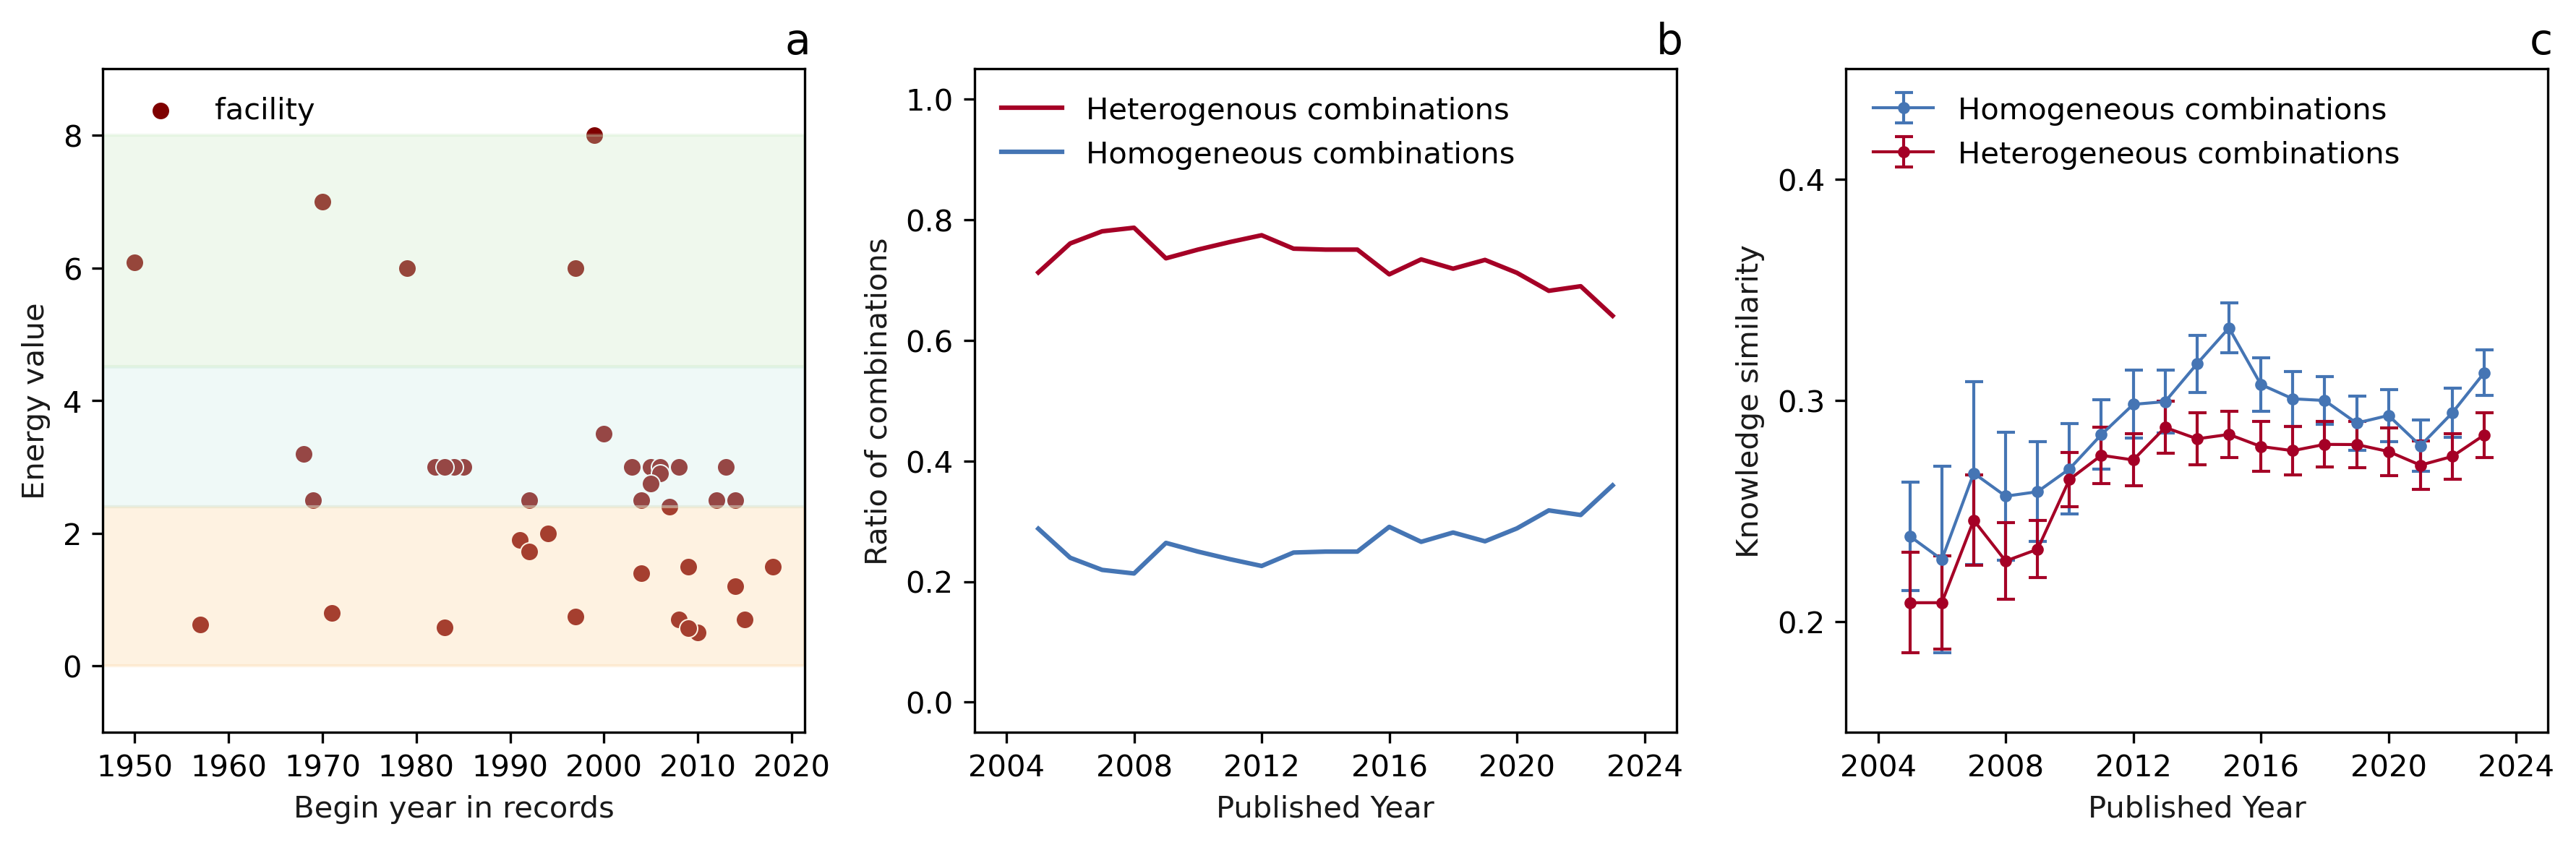

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4), dpi = 300)
df0 = Edf[['facility','energy_data','begin_year']]
df0['energy_data'] = df0['energy_data'].astype(float)
sns.scatterplot(x='begin_year', y='energy_data', data=df0, ax = axes[0], color = '#7f0000', label = 'facility')
axes[0].set_ylim(-1, 9)
axes[0].yaxis.set_major_locator(MultipleLocator(2))
axes[0].axhspan(0, 2.399, color='#fdd49e', alpha=0.3)  # alpha控制透明度
axes[0].axhspan(2.4, 4.5, color='#ccece6', alpha=0.3)  # alpha控制透明度
axes[0].axhspan(4.511, 8, color='#ccebc5', alpha=0.3)  # alpha控制透明度
axes[0].set_ylabel('Energy value', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0].set_xlabel('Begin year in records', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[0].xaxis.set_major_locator(MultipleLocator(10))
axes[0].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 1))

df1 = energy_pair[['PublishedYear','heter1homo0','heter0homo1']]
group1 = df1 .groupby(['PublishedYear']).agg({
    'heter1homo0':'mean',
    'heter0homo1':'mean'
}).reset_index()
group1 = group1[(group1['PublishedYear']>=2005)&(group1['PublishedYear']<=2023)]
axes[1].plot(group1['PublishedYear'], group1['heter1homo0'], color = '#a50026', label = 'Heterogenous combinations')
axes[1].plot(group1['PublishedYear'], group1['heter0homo1'], color = '#4575b4', label = 'Homogeneous combinations')
axes[1].set_ylabel('Ratio of combinations', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1].set_xlabel('Published Year', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[1].xaxis.set_major_locator(MultipleLocator(4))
axes[1].set_xlim(2003, 2025)
axes[1].set_ylim(-0.05, 1.05)
axes[1].yaxis.set_major_locator(MultipleLocator(0.2))
axes[1].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10}, loc='upper left', bbox_to_anchor=(0, 1))

df2 = know_div[['Facility_Pair', 'PublishedYear', 'JaccardSimilarity', 'heter1homo0', 'heter0homo1']]
group2 = df2.groupby(['PublishedYear', 'heter1homo0']).agg(
    mean_sim=('JaccardSimilarity', 'mean'),
    sem_sim=('JaccardSimilarity', 'sem')
).reset_index()
# 筛选年份
group2 = group2[(group2['PublishedYear'] >= 2005) & (group2['PublishedYear'] <= 2023)]

# 拆分
group20 = group2[group2['heter1homo0'] == 0]
group21 = group2[group2['heter1homo0'] == 1]
# 画 errorbar 图
axes[2].errorbar(
    group20['PublishedYear'], group20['mean_sim'],
    yerr=group20['sem_sim'], color='#4575b4', label='Homogeneous combinations',
    fmt='-o', capsize=3, markersize=3, linewidth=1
)
axes[2].errorbar(
    group21['PublishedYear'], group21['mean_sim'],
    yerr=group21['sem_sim'], color='#a50026', label='Heterogeneous combinations',
    fmt='-o', capsize=3, markersize=3, linewidth=1
)
# 其它设置保持不变
axes[2].set_ylabel('Knowledge similarity', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[2].set_xlabel('Published Year', fontsize=10, fontproperties=EF, color='#1a1a1a')
axes[2].xaxis.set_major_locator(MultipleLocator(4))
axes[2].set_xlim(2003, 2025)
axes[2].set_ylim(0.15, 0.45)
axes[2].yaxis.set_major_locator(MultipleLocator(0.1))
axes[2].legend(frameon=False, prop={'family': EF.get_name(), 'size': 10},
               loc='upper left', bbox_to_anchor=(0, 1))

for i, ax in enumerate(axes.flat):
    ax.text(0.99, 1.01, chr(97 + i), transform=ax.transAxes, 
            fontsize=14, verticalalignment='bottom', horizontalalignment='center')

plt.tight_layout()
plt.savefig(main_path + r'Co-utilization/2-Revision202501-DataVisualize/1-Figure-4.svg', bbox_inches='tight')
plt.show()